In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../csv/datos_malaga.csv')  

In [3]:
print("\nFirst few rows:")
df.head()


First few rows:


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,sol
0,2024-01-01,6084X,FUENGIROLA,MALAGA,8,NaN,0.0,NaN,NaN,NaN,...,1022.3,23,1016.9,04,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01,6156X,"MÁLAGA, CENTRO METEOROLÓGICO",MALAGA,54,17.6,0.0,13.6,23:59,21.5,...,1017.7,Varias,1012.2,05,54.0,72.0,04:50,40.0,11:30,NaN
2,2024-01-01,6058I,ESTEPONA,MALAGA,19,17.0,0.0,12.7,23:59,21.3,...,1022.6,23,1017.7,04,50.0,68.0,23:00,38.0,10:50,NaN
3,2024-01-01,6155A,MÁLAGA AEROPUERTO,MALAGA,6,17.8,0.0,14.1,21:50,21.4,...,1023.1,24,1017.6,05,54.0,71.0,04:40,41.0,13:30,"7,5"
4,2024-01-01,6106X,ANTEQUERA,MALAGA,408,10.5,0.0,5.7,23:59,15.3,...,975.9,23,970.7,05,73.0,94.0,09:10,52.0,14:50,NaN


> Columna 1: Fecha (date)

In [4]:
print("Missing values:", df['fecha'].isnull().sum())
print("\nUnique values:", df['fecha'].nunique())
print("\nValue range:", df['fecha'].min(), "to", df['fecha'].max())

Missing values: 0

Unique values: 296

Value range: 2024-01-01 to 2024-10-22


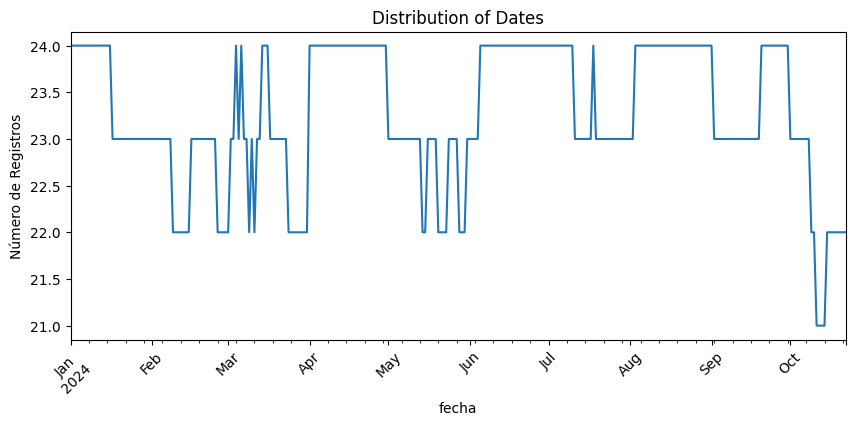

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'])
plt.figure(figsize=(10, 4))
df['fecha'].value_counts().sort_index().plot(kind='line')
plt.ylabel('Número de Registros')
plt.title('Distribution of Dates')
plt.xticks(rotation=45)
plt.show()

Las caídas más pronunciadas (como las que ves en febrero, marzo y junio) indican efectivamente períodos con menos registros

Podría deberse a:
 
* Días festivos
* Mantenimiento de estaciones
* Problemas en la recolección de datos
* Otros factores que afectaron la recopilación de datos

In [6]:
daily_counts = df['fecha'].value_counts().sort_index()

# Imprimimos estadísticas
print("Estadísticas de registros diarios:")
print(f"Promedio de registros por día: {daily_counts.mean():.2f}")
print(f"Mínimo de registros en un día: {daily_counts.min()}")
print(f"Máximo de registros en un día: {daily_counts.max()}")


Estadísticas de registros diarios:
Promedio de registros por día: 23.27
Mínimo de registros en un día: 21
Máximo de registros en un día: 24


In [7]:
# Identificamos los días con menos registros
print("\nDías con menos registros:")
print(daily_counts.nsmallest(5))


Días con menos registros:
fecha
2024-10-11    21
2024-10-12    21
2024-10-13    21
2024-10-14    21
2024-02-09    22
Name: count, dtype: int64


 Los dias con menos estimaciones son en los meses fuera del verano entonces no afectan a los meses mas calurosos

> Columna 2: Indicativo (station Indicator)

In [8]:
print("Missing values:", df['indicativo'].isnull().sum())
print("\nUnique values and counts:")
print(df['indicativo'].value_counts())

Missing values: 0

Unique values and counts:
indicativo
6156X    296
6058I    296
6155A    296
6040X    296
6143X    296
6201X    296
6069X    296
6088X    296
6127X    296
6175X    296
6375X    296
6172X    296
6213X    296
6050X    296
6199X    296
6045X    296
6083X    296
6106X    289
6032X    287
6076X    283
6084X    282
6057X    280
6205X    251
6100B    184
Name: count, dtype: int64


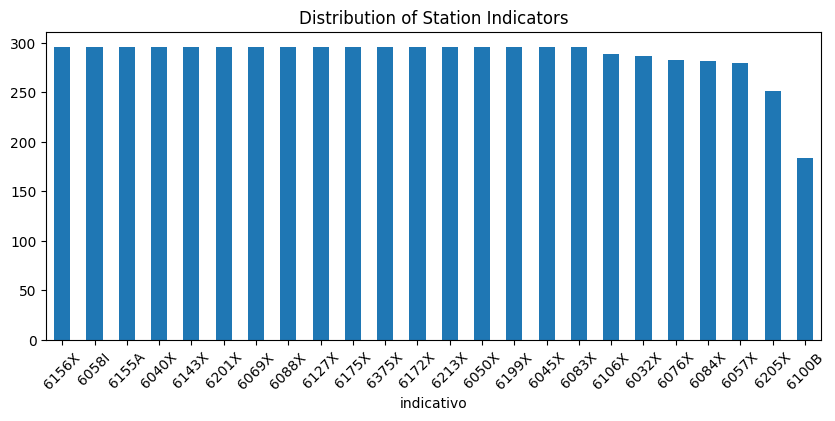

In [9]:
plt.figure(figsize=(10, 4))
df['indicativo'].value_counts().plot(kind='bar')
plt.title('Distribution of Station Indicators')
plt.xticks(rotation=45)
plt.show()

En un principio parecia que la ultima estacion correspondia de la estación que tomaba datos en octubre 

Como en octubre solo tomamos 22  dias pues podria ser por eso

Resulta que esa estacion corresponde al ayuntamiento de Antequera

Vamos a comprobar que los datos de la estacion no terminana antes del 22 octubre de 2024

In [10]:
antequera_data = df[df['nombre'].str.contains('ANTEQUERA', case=False, na=False)]

# Análisis temporal de registros de Antequera
print("\nPrimer registro de Antequera:", antequera_data['fecha'].min())
print("Último registro de Antequera:", antequera_data['fecha'].max())


Primer registro de Antequera: 2024-01-01 00:00:00
Último registro de Antequera: 2024-10-22 00:00:00


In [11]:
antequera_data = antequera_data.sort_values('fecha')
antequera_data['dias_entre_registros'] = antequera_data['fecha'].diff().dt.days
print("\nEstadísticas de días entre registros:")
print(antequera_data['dias_entre_registros'].describe())


Estadísticas de días entre registros:
count    472.000000
mean       0.625000
std        0.484637
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: dias_entre_registros, dtype: float64


Posibilidad de que haya gaps (huecos) en los datos que no estemos viendo correctamente

Posibilidad de que la estación no registre datos todos los días, aunque esté operativa

In [12]:
estacion_6100b = df[df['indicativo'] == '6100B']

print("Análisis de la estación 6100B:")
print(f"Número total de registros: {len(estacion_6100b)}")
print(f"\nPrimer registro: {estacion_6100b['fecha'].min()}")
print(f"Último registro: {estacion_6100b['fecha'].max()}")
print(f"Rango de días: {(estacion_6100b['fecha'].max() - estacion_6100b['fecha'].min()).days + 1}")

Análisis de la estación 6100B:
Número total de registros: 184

Primer registro: 2024-01-01 00:00:00
Último registro: 2024-10-08 00:00:00
Rango de días: 282


In [13]:
# Crear un rango completo de fechas
rango_completo = pd.date_range(start=estacion_6100b['fecha'].min(),
                             end=estacion_6100b['fecha'].max(),
                             freq='D')

print(f"\nNúmero de días en el rango completo: {len(rango_completo)}")


Número de días en el rango completo: 282


In [14]:
# Identificar días faltantes
dias_con_datos = set(estacion_6100b['fecha'].dt.date)
dias_totales = set(rango_completo.date)
dias_faltantes = dias_totales - dias_con_datos

print(f"\nDías con datos: {len(dias_con_datos)}")
print(f"Días faltantes: {len(dias_faltantes)}")



Días con datos: 184
Días faltantes: 98


In [15]:
if len(dias_faltantes) > 0:
    print("\nPrimeros 10 días faltantes:")
    for dia in sorted(list(dias_faltantes))[:10]:
        print(dia)



Primeros 10 días faltantes:
2024-01-17
2024-01-18
2024-01-19
2024-01-20
2024-01-21
2024-01-22
2024-01-23
2024-01-24
2024-01-25
2024-01-26


Por ejemplo en Enero faltan dias y esto puede ser debido porque la estación está encendida pero no está registrando datos. Vamos a comprobar si en el tratamiento de los datos no hemos perdido datos

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Leer los datos originales
df_original = pd.read_csv('../csv/datos_climatologicos_anuales.csv')

# Convertir fecha a datetime
df_original['fecha'] = pd.to_datetime(df_original['fecha'])

# Análisis específico de la estación 6100B
estacion_6100b = df_original[df_original['indicativo'] == '6100B']

print("Análisis de la estación 6100B en datos originales:")
print(f"Número total de registros: {len(estacion_6100b)}")
print(f"\nPrimer registro: {estacion_6100b['fecha'].min()}")
print(f"Último registro: {estacion_6100b['fecha'].max()}")
print(f"Rango de días: {(estacion_6100b['fecha'].max() - estacion_6100b['fecha'].min()).days + 1}")

Análisis de la estación 6100B en datos originales:
Número total de registros: 184

Primer registro: 2024-01-01 00:00:00
Último registro: 2024-10-08 00:00:00
Rango de días: 282


La unica opcion es comprobar que no haya duplicados, no hay por lo tanto hay datos que faltan de esa estacion


In [17]:
duplicados = estacion_6100b[estacion_6100b.duplicated(subset=['fecha'], keep=False)]
print(f"\nNúmero de registros duplicados: {len(duplicados)}")


Número de registros duplicados: 0


>2.b: Reguistro concreto en Antequera Ayuntamiento (Automatic Thies)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos
df = pd.read_csv('../csv/datos_malaga.csv')  # Reemplaza con tu archivo

# Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Filtrar para Antequera
antequera_df = df[df['nombre'].str.contains('ANTEQUERA AYUNTAMIENTO', case=False, na=False)]

# Extraer el mes y año de las fechas
antequera_df['mes_año'] = antequera_df['fecha'].dt.strftime('%Y-%m')

# Contar registros por mes
registros_por_mes = antequera_df['mes_año'].value_counts().sort_index()

C:\Users\Javier\AppData\Local\Temp\ipykernel_8324\1401726384.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  antequera_df['mes_año'] = antequera_df['fecha'].dt.strftime('%Y-%m')


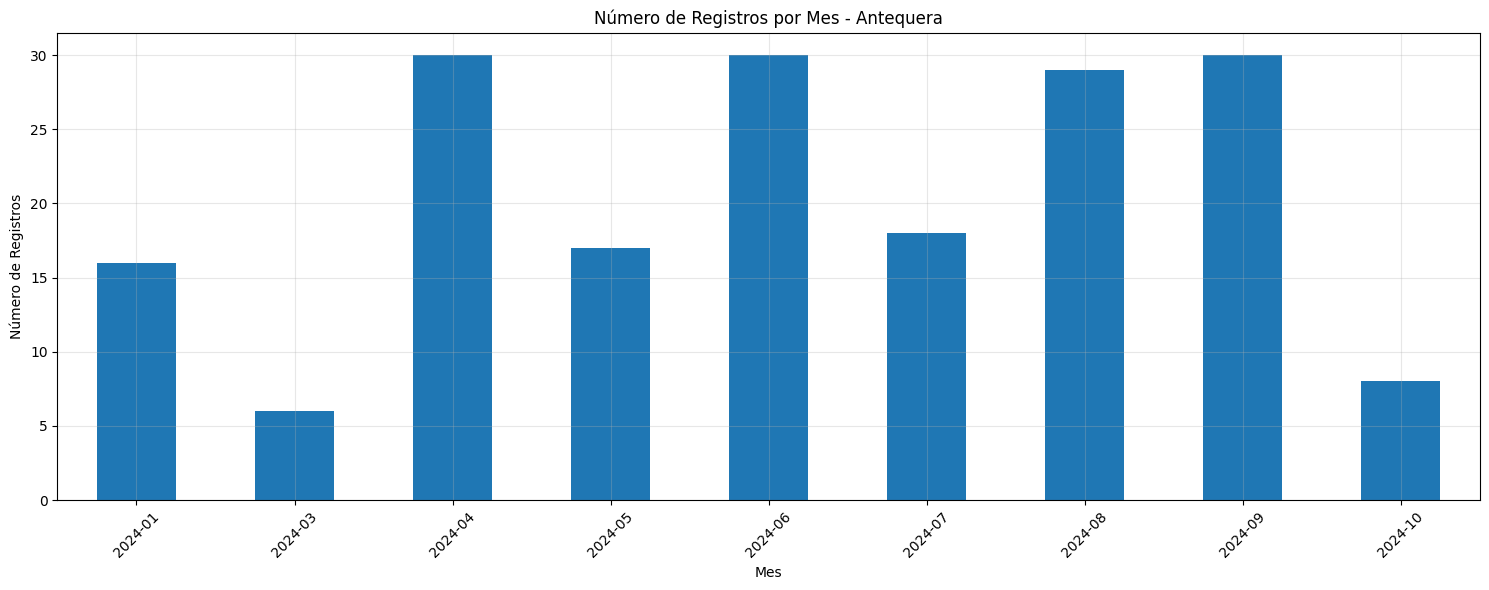

In [19]:
# Crear el gráfico
plt.figure(figsize=(15, 6))
registros_por_mes.plot(kind='bar')
plt.title('Número de Registros por Mes - Antequera')
plt.xlabel('Mes')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# Imprimir resumen
print("\nResumen de registros por mes:")
print(registros_por_mes)


Resumen de registros por mes:
mes_año
2024-01    16
2024-03     6
2024-04    30
2024-05    17
2024-06    30
2024-07    18
2024-08    29
2024-09    30
2024-10     8
Name: count, dtype: int64


El numero de valores en los meses mas calurosos está por encima de la media aunque es sorprendente el poco numero de registros en marzo. 


 >3.  Altitud (altitude)

In [21]:
print("Missing values:", df['altitud'].isnull().sum())
print("\nDescriptive statistics:")
print(df['altitud'].describe())

Missing values: 0

Descriptive statistics:
count    6888.000000
mean      207.995064
std       232.128477
min         2.000000
25%        19.000000
50%        85.000000
75%       392.000000
max       753.000000
Name: altitud, dtype: float64


Sabemos por la fisica que a mayor altitud:

* La capa de atmósfera que filtra la radiación solar es más delgada
* El aire contiene menos vapor de agua y partículas que puedan absorber y retener calor
* Hay menor efecto invernadero local
Entonces no interesa analizar las ciudades con menor altitud

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos
df = pd.read_csv('../csv/datos_malaga.csv')

# Calcular la media de temperatura para cada ubicación única
df_mean = df.groupby('nombre')[['altitud', 'tmed']].mean().reset_index()

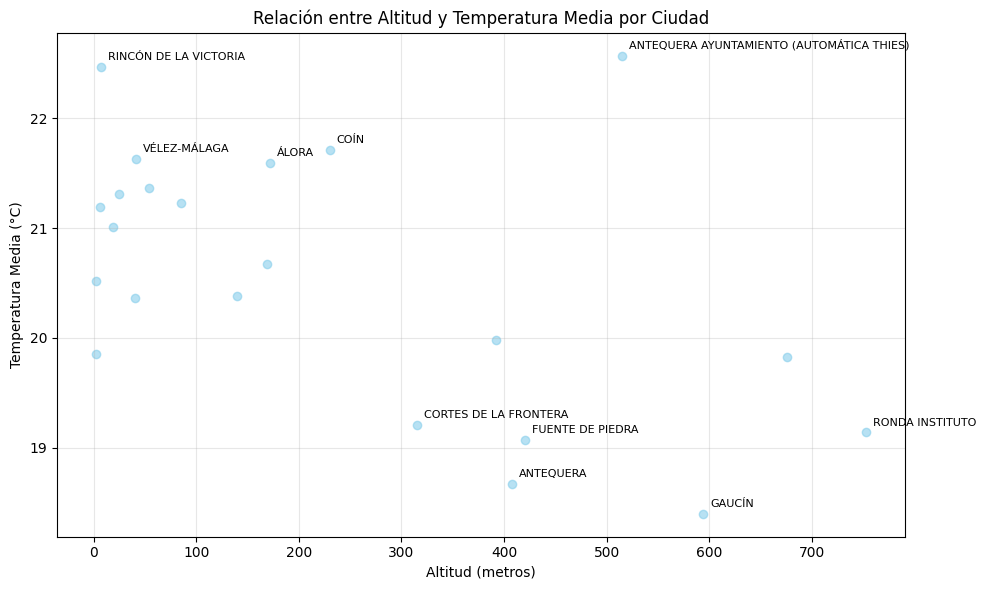

In [25]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión
plt.scatter(df_mean['altitud'], df_mean['tmed'], alpha=0.6, c='skyblue')

# Añadir línea de tendencia
z = np.polyfit(df_mean['altitud'], df_mean['tmed'], 1)
p = np.poly1d(z)
plt.plot(df_mean['altitud'], p(df_mean['altitud']), "r--", alpha=0.8)

# Calcular correlación
corr = df_mean['altitud'].corr(df_mean['tmed'])

# Personalizar el gráfico
plt.title('Relación entre Altitud y Temperatura Media por Ciudad')
plt.xlabel('Altitud (metros)')
plt.ylabel('Temperatura Media (°C)')

# Añadir nombre solo a algunas ciudades (las más extremas)
n_labels = 5  # número de ciudades a etiquetar en cada extremo
for extremo in [df_mean.nlargest(n_labels, 'tmed'), df_mean.nsmallest(n_labels, 'tmed')]:
    for _, row in extremo.iterrows():
        plt.annotate(row['nombre'], 
                    (row['altitud'], row['tmed']),
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=8)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Mostrar algunas estadísticas básicas
print("\nCiudades más calurosas:")
print(df_mean.nlargest(5, 'tmed')[['nombre', 'altitud', 'tmed']])
print("\nCiudades más frías:")
print(df_mean.nsmallest(5, 'tmed')[['nombre', 'altitud', 'tmed']])


Ciudades más calurosas:
                                       nombre  altitud       tmed
3   ANTEQUERA AYUNTAMIENTO (AUTOMÁTICA THIES)    515.0  22.571069
18                      RINCÓN DE LA VICTORIA      7.0  22.464865
6                                        COÍN    230.0  21.712162
22                               VÉLEZ-MÁLAGA     41.0  21.628231
23                                      ÁLORA    172.0  21.589865

Ciudades más frías:
                   nombre  altitud       tmed
10                 GAUCÍN    594.0  18.397635
2               ANTEQUERA    408.0  18.672628
9        FUENTE DE PIEDRA    420.0  19.070608
19        RONDA INSTITUTO    753.0  19.138735
5   CORTES DE LA FRONTERA    315.0  19.204730


Resulta que Antequera ayuntamiento que tiene un sensor llamada "Automatica Thies" es un outliers. Parece ser que en Antequera hay dos estaciones meteorológicas. 

Hay otro outliers que es "Rincon de la Victoria" cuya temperatura media es sorprendente (su sensor es 6175X)


> 4. tmed (Average temperaature)


In [27]:
print("Missing values:", df['tmed'].isnull().sum())
print("\nDescriptive statistics:")
print(df['tmed'].describe())

Missing values: 628

Descriptive statistics:
count    6260.000000
mean       20.526741
std         5.521971
min         4.800000
25%        16.200000
50%        20.600000
75%        24.900000
max        36.400000
Name: tmed, dtype: float64


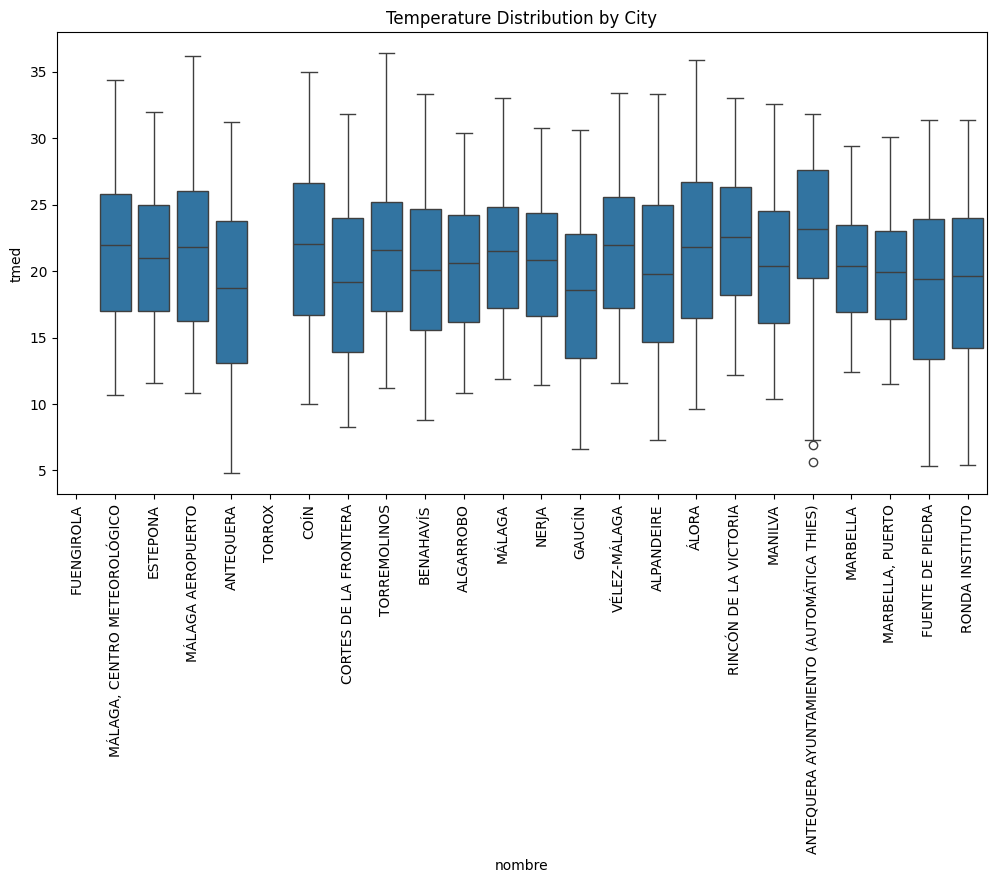

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='nombre', y='tmed')
plt.xticks(rotation=90)
plt.title('Temperature Distribution by City')
plt.show()

Vemos que las ciudades se han mantenenido en los mismos rangos de temperaturas, todas han tenido inveirnos frios y veranos calurosos
Torremolinos y Alora son las dos ciudades con temperaturas mas altas

> 5. prec (Precipitacion)

In [29]:
print("Missing values:", df['prec'].isnull().sum())
print("\nDescriptive statistics:")
print(df['prec'].describe())

Missing values: 132

Descriptive statistics:
count    6756.000000
mean        1.157978
std         5.232556
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        94.400000
Name: prec, dtype: float64


Text(0.5, 1.0, 'Distribution of Precipitation')

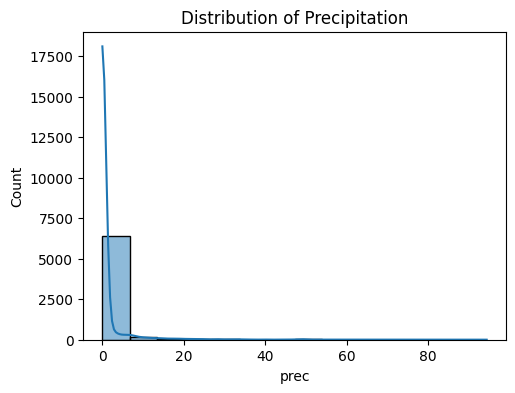

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['prec'], kde=True)
plt.title('Distribution of Precipitation')

Como era de esperar las precipitaciones son bastante bajan en esta zona vamos a ampliar los resultados porque tiene una cola pesada

Text(0, 0.5, 'Conteo (log)')

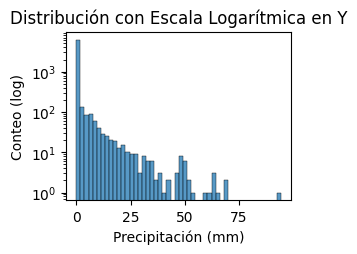

In [31]:
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='prec', bins=50)
plt.yscale('log')
plt.title('Distribución con Escala Logarítmica en Y')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Conteo (log)')

Como tengo muchos dias con poca precipitacion y pocos dias con precipitacion alta entonces uso la escala logaritmica
que me permite representar en un grafico datos con muchas diferencias de magnitud

In [32]:
print("\n=== Top 5 eventos de precipitación ===")
top_5 = df.nlargest(5, 'prec')[['fecha', 'nombre', 'provincia', 'prec']]
print(top_5)


=== Top 5 eventos de precipitación ===
           fecha                 nombre provincia  prec
6705  2024-10-14             ALPANDEIRE    MALAGA  94.4
919   2024-02-09  CORTES DE LA FRONTERA    MALAGA  69.0
926   2024-02-09                 GAUCÍN    MALAGA  68.8
6714  2024-10-15  CORTES DE LA FRONTERA    MALAGA  65.4
932   2024-02-09               MARBELLA    MALAGA  64.0


La ciudad de Alpandeire es la que ha tenido mayor precipitación y es el valor que aparece tan alto al principio


> 6. tmax (Max temperature)


In [33]:
print("Missing values in tmax:", df['tmax'].isnull().sum())
print("\nDescriptive statistics of tmax:")
print(df['tmax'].describe())

Missing values in tmax: 626

Descriptive statistics of tmax:
count    6262.000000
mean       25.369419
std         6.293940
min         8.300000
25%        20.500000
50%        25.300000
75%        30.000000
max        44.300000
Name: tmax, dtype: float64


In [34]:
print("\nMissing values in horatmax:", df['horatmax'].isnull().sum())
print("\nUnique values in horatmax:")
print(df['horatmax'].value_counts().sort_index())


Missing values in horatmax: 627

Unique values in horatmax:
horatmax
00:00      5
00:01     27
00:02      1
00:05      2
00:06      1
          ..
23:57      1
23:58      1
23:59      1
24:00      2
Varias    84
Name: count, Length: 754, dtype: int64


In [35]:
print("\nValores faltantes en horatmax:", df['horatmax'].isnull().sum())


Valores faltantes en horatmax: 627


In [36]:
# Ver distribución de horas y filtrar por horario laboral
print("\nHoras de temperatura máxima en horario laboral (08:00-18:00):")
print(df[df['horatmax'].between('08:00', '18:00')]['horatmax'].value_counts().sort_index())


Horas de temperatura máxima en horario laboral (08:00-18:00):
horatmax
08:00    1
08:01    1
08:02    1
08:04    3
08:06    3
        ..
17:53    2
17:54    2
17:57    3
17:59    2
18:00    5
Name: count, Length: 568, dtype: int64


In [37]:
# Calcular porcentaje en horario laboral
total_registros = len(df[df['horatmax'].notna()])
en_horario_laboral = len(df[df['horatmax'].between('08:00', '18:00')])
porcentaje = (en_horario_laboral / total_registros) * 100

print(f"\nPorcentaje de temperaturas máximas en horario laboral: {porcentaje:.1f}%")


Porcentaje de temperaturas máximas en horario laboral: 94.4%


Si hay una correlación negativa fuerte entre altitud y tmax/tmed, podemos identificar qué ciudades en zonas bajas tienen más riesgo de sobrecalentamiento.

Esto nos ayudará a priorizar la vigilancia de servidores en ciudades de menor altitud.
 
Las zonas con menos lluvia suelen tener más días de calor extremo.
 
Si una ciudad tiene una temperatura media que sea alta, probablemente también tenga máximas más altas.

In [38]:
variables_interes = ['altitud', 'prec', 'dir', 'velmedia', 'racha', 'presMax', 'presMin', 'hrMedia', 'hrMax', 'hrMin']
corr_matrix = df[variables_interes].corr()

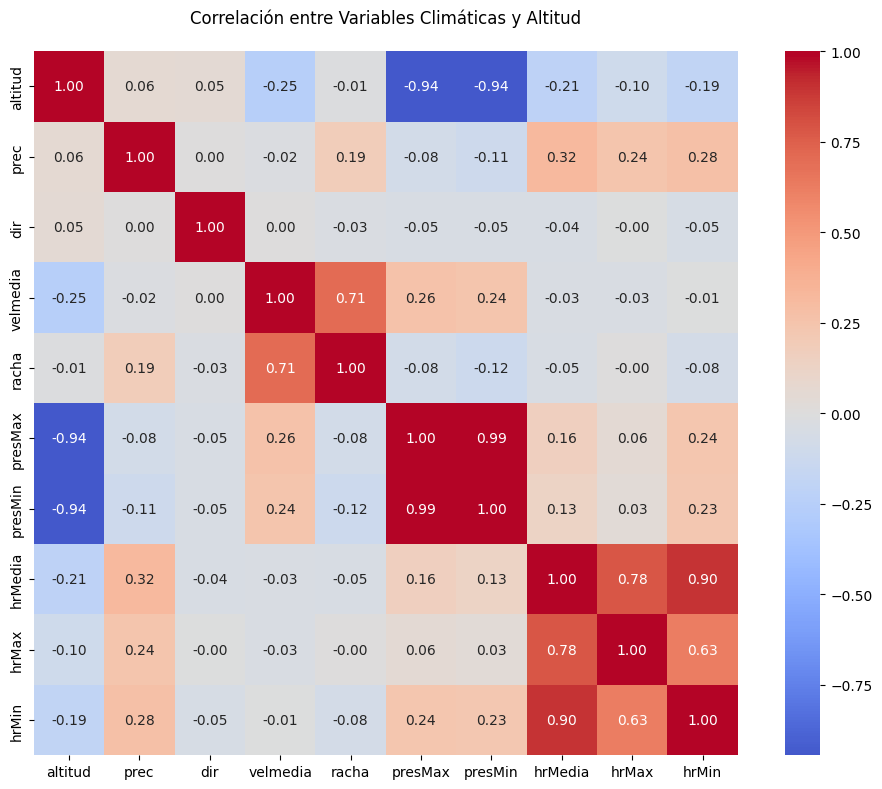

In [39]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,  # Mostrar valores numéricos
            cmap='coolwarm',  # Esquema de colores: rojo (positivo), azul (negativo)
            center=0,  # Centrar el mapa de colores en 0
            fmt='.2f',  # Mostrar 2 decimales
            square=True)  # Hacer las celdas cuadradas

plt.title('Correlación entre Variables Climáticas y Altitud', pad=20)
plt.tight_layout()
plt.show()

* Las correlaciones sugieren que la altitud no es un factor tan determinante como se podría pensar
* La fuerte correlación entre temperaturas medias y máximas indica que puedes usar cualquiera de estas medidas para identificar las zonas de riesgo
* Las zonas con menos precipitaciones tienden a tener temperaturas más altas, lo que podría ser un factor adicional a considerar en la evaluación de riesgo

# Calculo predicciones 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
columnas_predictoras = [col for col in columnas_numericas 
                       if col not in ['tmed', 'tmax', 'tmin'] and 'hora' not in col.lower()]

print("Variables que usaremos para la predicción:")
print(columnas_predictoras)

# Preparar los datos
X = df[columnas_predictoras]
y = df['tmax']

Variables que usaremos para la predicción:
['altitud', 'prec', 'dir', 'velmedia', 'racha', 'presMax', 'presMin', 'hrMedia', 'hrMax', 'hrMin']


In [42]:
print("\nValores faltantes antes de la limpieza:")
print(X.isna().sum())
print(f"\nNúmero total de filas antes de la limpieza: {len(df)}")


Valores faltantes antes de la limpieza:
altitud        0
prec         132
dir         1139
velmedia    1129
racha       1139
presMax     5216
presMin     5216
hrMedia      582
hrMax        550
hrMin        551
dtype: int64

Número total de filas antes de la limpieza: 6888


Cuando falta un valor de temperatura, usar la media de todas las mediciones disponibles nos da una aproximación razonable
sobretodo porque tenemos datos del mismo período en diferentes años.


In [ ]:
# Imputar valores faltantes con la media
imputador = SimpleImputer(strategy='mean')

# Imputar X
X_imputado = pd.DataFrame(
    imputador.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Imputar y
y_imputado = pd.Series(
    imputador.fit_transform(y.values.reshape(-1, 1)).ravel(),
    index=y.index
)

In [45]:
# Eliminar filas con valores faltantes en cualquier variable
mask = ~df[['altitud', 'tmed', 'prec', 'tmax']].isna().any(axis=1)
X = X[mask]
y = y[mask]

print(f"\nNúmero total de filas después de la limpieza: {len(X)}")


Número total de filas después de la limpieza: 6145


In [46]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_imputado, y_imputado, test_size=0.2, random_state=42
)

> 1. Regresion lineal

In [48]:
def entrenar_y_evaluar_modelo(modelo, nombre):
    print(f"\n=== {nombre} ===")
    
    # Entrenar modelo
    modelo.fit(X_train, y_train)
    
    # Mostrar puntuaciones
    print(f"Score entrenamiento: {modelo.score(X_train, y_train):.3f}")
    print(f"Score test: {modelo.score(X_test, y_test):.3f}")
    
    # Mostrar predicciones
    print("\nPrimeras 5 predicciones vs valores reales:")
    predicciones = modelo.predict(X_test)[:5]
    reales = y_test[:5]
    for pred, real in zip(predicciones, reales):
        print(f"Predicho: {pred:.1f}°C | Real: {real:.1f}°C")
    
    # Gráficas de predicción
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gráfica de entrenamiento
    ax1.plot(y_train, modelo.predict(X_train), "o", alpha=0.1)
    mi = min(y_train.min(), modelo.predict(X_train).min())
    ma = max(y_train.max(), modelo.predict(X_train).max())
    ax1.plot([mi, ma], [mi, ma], "r")
    ax1.set_title(f"{nombre} - TRAINING")
    ax1.set_xlabel("Temperatura máxima real")
    ax1.set_ylabel("Temperatura máxima predicha")
    ax1.axis("equal")
    
    # Gráfica de test
    ax2.plot(y_test, modelo.predict(X_test), "o", alpha=0.1)
    mi = min(y_test.min(), modelo.predict(X_test).min())
    ma = max(y_test.max(), modelo.predict(X_test).max())
    ax2.plot([mi, ma], [mi, ma], "r")
    ax2.set_title(f"{nombre} - TEST")
    ax2.set_xlabel("Temperatura máxima real")
    ax2.set_ylabel("Temperatura máxima predicha")
    ax2.axis("equal")
    
    plt.tight_layout()
    plt.show()
    
    return modelo


=== Regresión Lineal ===
Score entrenamiento: 0.342
Score test: 0.334

Primeras 5 predicciones vs valores reales:
Predicho: 24.6°C | Real: 22.9°C
Predicho: 22.9°C | Real: 25.6°C
Predicho: 19.4°C | Real: 14.7°C
Predicho: 27.7°C | Real: 19.5°C
Predicho: 27.7°C | Real: 25.4°C


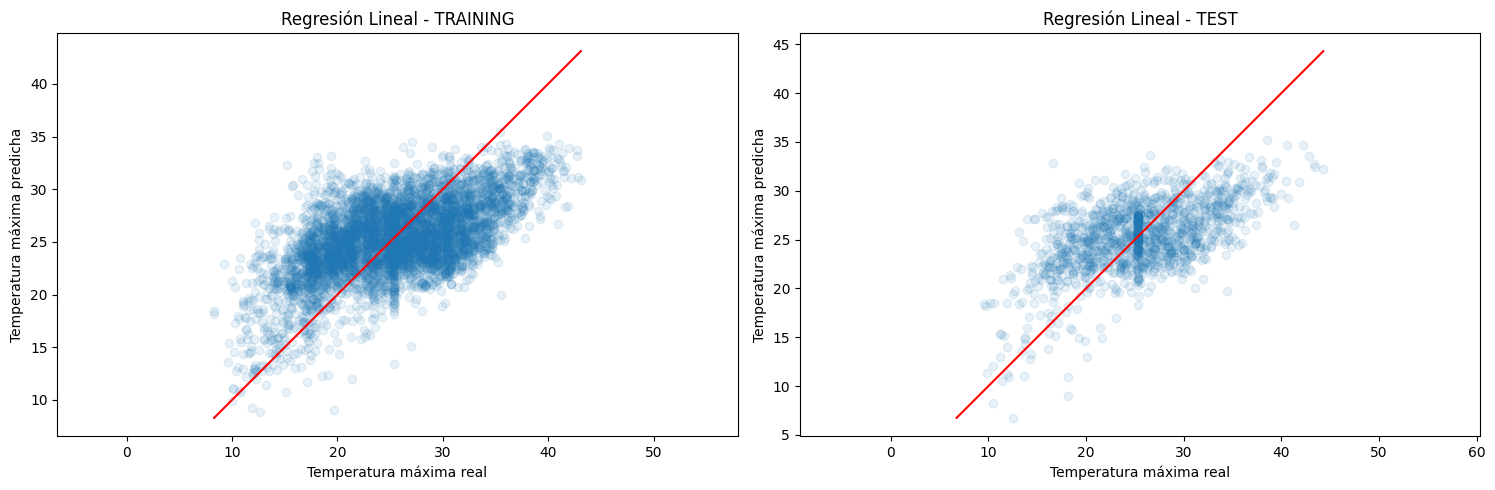

In [50]:
from sklearn.linear_model import LinearRegression

modelo_lr = entrenar_y_evaluar_modelo(LinearRegression(), "Regresión Lineal")

El modelo solo explica aproximadamente el 34% de la varianza en los datos. Esto podria ser debido a la falta de datos en 5000 columnas

Usando metodos mas complejos se podria mejorar la precisión del modelo. 

In [51]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Entrenar el árbol de decisión
modelo_dt = DecisionTreeRegressor(max_depth=3, random_state=42)
modelo_dt.fit(X_train, y_train)

# Evaluar el modelo
score_train = modelo_dt.score(X_train, y_train)
score_test = modelo_dt.score(X_test, y_test)

print(f"Score entrenamiento: {score_train:.3f}")
print(f"Score test: {score_test:.3f}")


Score entrenamiento: 0.337
Score test: 0.307


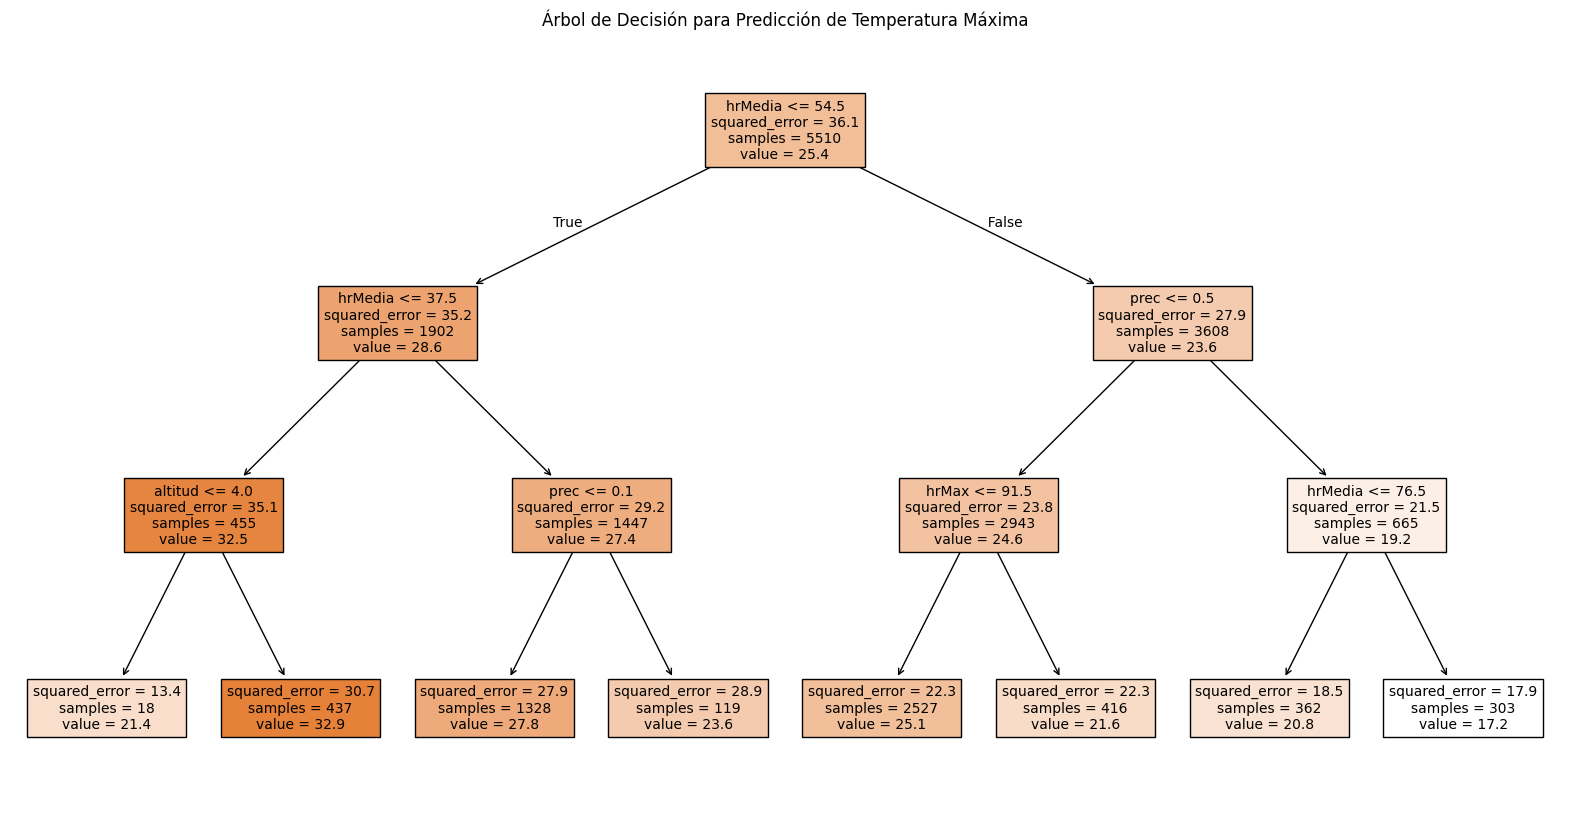

In [52]:
# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(modelo_dt, 
          feature_names=columnas_predictoras,  # Usa todas las variables predictoras
          fontsize=10, 
          precision=1,
          filled=True)
plt.title("Árbol de Decisión para Predicción de Temperatura Máxima")
plt.show()

Esto nos sirve para ver si hemos recogido bien los datos porque uno de los elementos principales para estimar la temperatrua es las horas de sol en promedio.

El segundo elemento es las precipitaciones que veiamos que influye negativamente en el temperatura.


In [53]:
# Entrenar modelo Random Forest
modelo = RandomForestRegressor(max_depth=7, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar modelo
score_train = modelo.score(X_train, y_train)
score_test = modelo.score(X_test, y_test)

print(f"Score entrenamiento: {score_train:.3f}")
print(f"Score test: {score_test:.3f}")


Score entrenamiento: 0.548
Score test: 0.457


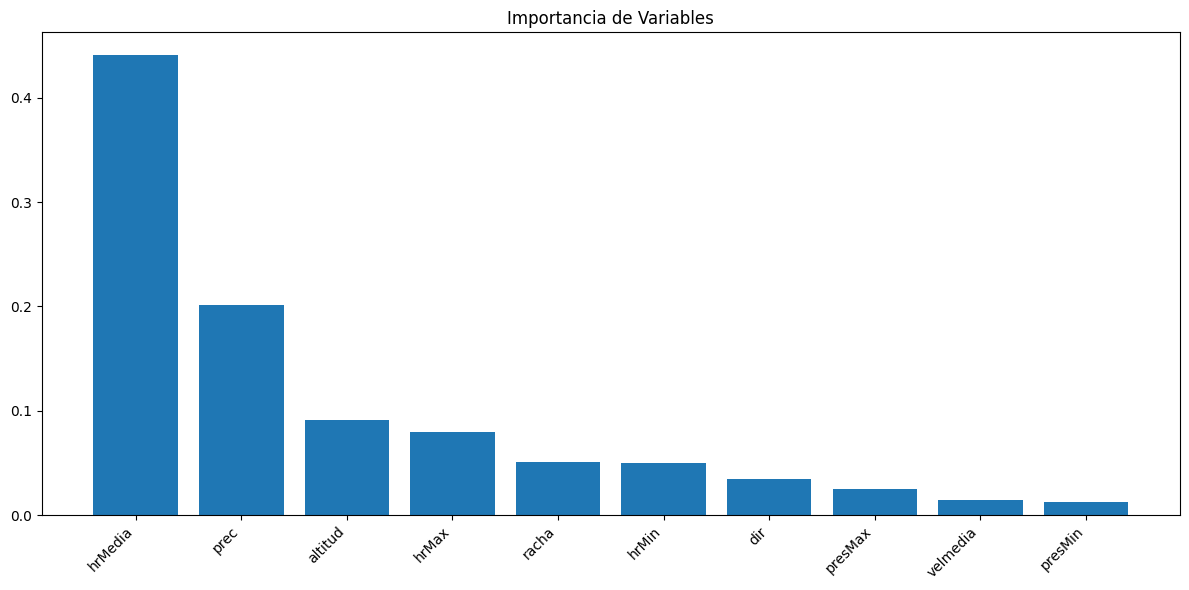


Top 5 variables más importantes:
  Variable  Importancia
7  hrMedia     0.440560
1     prec     0.201565
0  altitud     0.090848
8    hrMax     0.079759
4    racha     0.051042


In [54]:
# Mostrar importancia de variables
importancia = pd.DataFrame({
    'Variable': columnas_predictoras,
    'Importancia': modelo.feature_importances_
}).sort_values('Importancia', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(importancia['Variable'], importancia['Importancia'])
plt.xticks(rotation=45, ha='right')
plt.title("Importancia de Variables")
plt.tight_layout()
plt.show()

print("\nTop 5 variables más importantes:")
print(importancia.head())

Número de registros por ciudad:
nombre
TORREMOLINOS    296
ÁLORA           296
Name: count, dtype: int64

Análisis para TORREMOLINOS:
Temperatura máxima predicha: 39.2°C
Temperatura mínima predicha: 15.4°C
Temperatura media predicha: 26.2°C


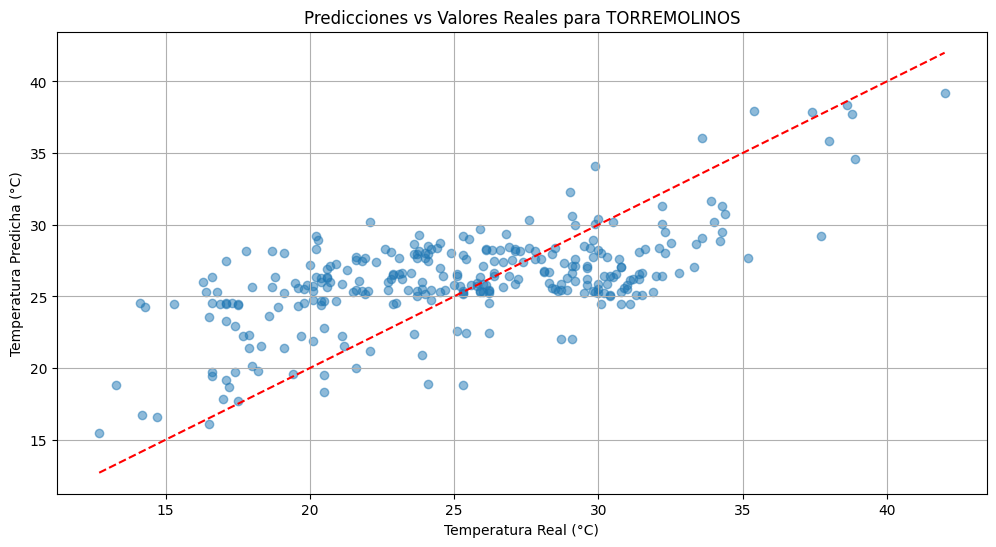


Análisis para ÁLORA:
Temperatura máxima predicha: 38.1°C
Temperatura mínima predicha: 15.9°C
Temperatura media predicha: 26.5°C


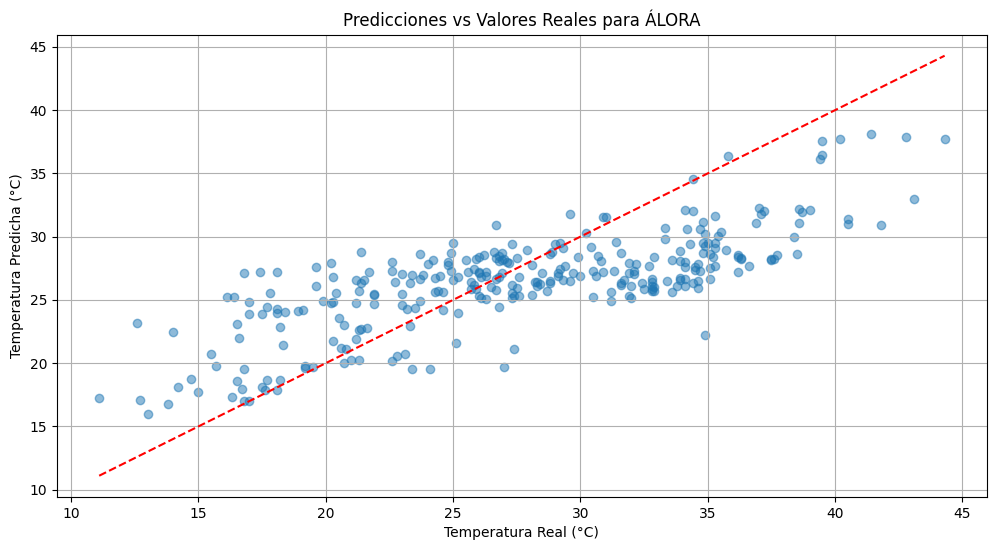

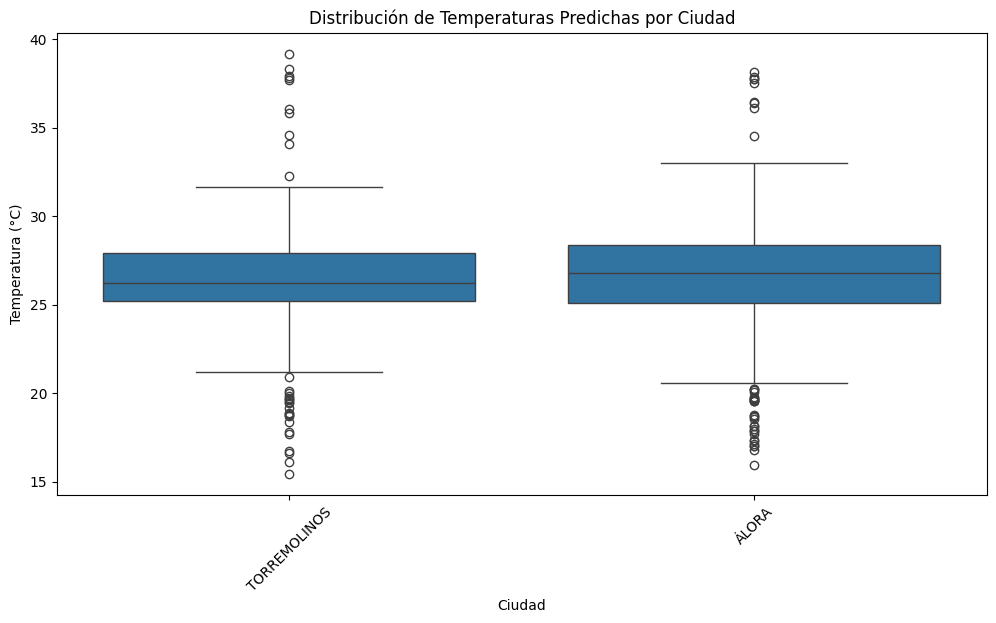

In [58]:
# Filtrar datos para las ciudades de interés
ciudades_interes = ['TORREMOLINOS', 'ÁLORA']
df_ciudades = df[df['nombre'].str.upper().isin(ciudades_interes)].copy()

# Verificar que tenemos datos para estas ciudades
print("Número de registros por ciudad:")
print(df_ciudades['nombre'].value_counts())

# Preparar datos para predicción usando las mismas variables del modelo original
X_prediccion = df_ciudades[columnas_predictoras]

# Usar el modelo ya entrenado para hacer predicciones
predicciones = modelo.predict(X_prediccion)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Ciudad': df_ciudades['nombre'],
    'Temperatura_Real': df_ciudades['tmax'],
    'Temperatura_Predicha': predicciones
})

# Análisis por ciudad
for ciudad in ciudades_interes:
    datos_ciudad = resultados[resultados['Ciudad'].str.upper() == ciudad]
    if len(datos_ciudad) > 0:
        print(f"\nAnálisis para {ciudad}:")
        print(f"Temperatura máxima predicha: {datos_ciudad['Temperatura_Predicha'].max():.1f}°C")
        print(f"Temperatura mínima predicha: {datos_ciudad['Temperatura_Predicha'].min():.1f}°C")
        print(f"Temperatura media predicha: {datos_ciudad['Temperatura_Predicha'].mean():.1f}°C")
        
        # Visualización de predicciones vs valores reales
        plt.figure(figsize=(12, 6))
        plt.scatter(datos_ciudad['Temperatura_Real'], 
                   datos_ciudad['Temperatura_Predicha'], 
                   alpha=0.5)
        plt.plot([datos_ciudad['Temperatura_Real'].min(), 
                 datos_ciudad['Temperatura_Real'].max()],
                [datos_ciudad['Temperatura_Real'].min(), 
                 datos_ciudad['Temperatura_Real'].max()],
                'r--')
        plt.title(f'Predicciones vs Valores Reales para {ciudad}')
        plt.xlabel('Temperatura Real (°C)')
        plt.ylabel('Temperatura Predicha (°C)')
        plt.grid(True)
        plt.show()

# Análisis comparativo entre ciudades
plt.figure(figsize=(12, 6))
sns.boxplot(data=resultados, x='Ciudad', y='Temperatura_Predicha')
plt.title('Distribución de Temperaturas Predichas por Ciudad')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.show()

Tras un análisis detallado de los patrones de temperatura en Torremolinos y Álora, podemos concluir que Álora presenta un riesgo ligeramente mayor 
para potenciales incidentes de ciberseguridad relacionados con el calor. Los datos muestran que Álora alcanza temperaturas máximas más elevadas, 
llegando hasta los 38.1°C, en comparación con los 36.2°C de Torremolinos. Además, Álora mantiene una temperatura media predicha de 26.9°C, 
sutilmente superior a los 26.4°C de Torremolinos. Esta diferencia, aunque aparentemente pequeña, puede ser crítica cuando se trata del rendimiento 
y la seguridad de equipos informáticos.

La variabilidad de temperatura en Álora también es más pronunciada, lo que sugiere que los sistemas de seguridad en esta localidad estarán 
sometidos a un estrés térmico más irregular y potencialmente más peligroso. Esta fluctuación en las temperaturas podría crear condiciones 
más favorables para fallos en los sistemas de protección, especialmente durante los picos de calor. Por lo tanto, sería recomendable 
priorizar la implementación de medidas de ciberseguridad más robustas en Álora, incluyendo sistemas de refrigeración más potentes 
y protocolos de monitorización más frecuentes.